# Normal Day Analysis

In [1]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 
# Step 5: Adjust the pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 240)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.expand_frame_repr', False)

# Display th

In [2]:
testfile='test7.parquet'

In [3]:
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.


In [4]:
test=pd.read_parquet(testfile)

In [5]:
test.head()

,timestamp,src_ip,dst_ip,proto,port,up_bytes,down_bytes
index,,,,,,,
781742,1550453,192.168.107.134,192.168.107.227,udp,53,199,474
781743,1550545,192.168.107.134,142.250.184.174,tcp,443,10327,59149
781744,1550546,192.168.107.134,142.250.184.174,tcp,443,9284,58110
781745,1550616,192.168.107.134,142.250.184.174,tcp,443,7955,71231
781746,1550760,192.168.107.134,142.250.184.174,tcp,443,6106,79662


In [6]:
NET=ipaddress.IPv4Network('192.168.107.0/24')
private_dst_test = test[test.apply(lambda x: ipaddress.IPv4Address(x['dst_ip']) in NET,axis=1)]

private_dst_test.head()



,timestamp,src_ip,dst_ip,proto,port,up_bytes,down_bytes
index,,,,,,,
781742,1550453,192.168.107.134,192.168.107.227,udp,53,199,474
781761,1555264,192.168.107.134,192.168.107.234,udp,53,190,389
781762,1555268,192.168.107.134,192.168.107.234,udp,53,194,388
781763,1555274,192.168.107.134,192.168.107.234,udp,53,169,395
781767,1560348,192.168.107.134,192.168.107.234,udp,53,121,317


In [75]:
private_dst_test
private_dst_test = private_dst_test.groupby(['src_ip','dst_ip']).sum()
private_dst_test['ratio'] = private_dst_test['up_bytes'] / private_dst_test['down_bytes']
private_dst_test.groupby('dst_ip')['ratio'].mean().reset_index().sort_values(by="ratio", ascending=False).head(17)


,dst_ip,ratio
2,192.168.107.205,1.023619
0,192.168.107.114,0.998404
1,192.168.107.126,0.995649
9,192.168.107.58,0.965760
6,192.168.107.227,0.437545
7,192.168.107.234,0.436713
8,192.168.107.238,0.111088
4,192.168.107.223,0.109747
3,192.168.107.222,0.109633
5,192.168.107.226,0.109025


In [82]:
 private_dst_test.groupby(['dst_ip']).sum()[[.
                                             ]]


,timestamp,proto,port,up_bytes,down_bytes,ratio
dst_ip,,,,,,
192.168.107.114,912745687,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,91258,476177,474858,2.995211
192.168.107.126,927200891,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,97903,493790,495273,2.986948
192.168.107.205,780627800,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,80626,407570,405235,3.070857
192.168.107.222,193001464434,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,18179834,467783205,4338676962,21.488129
192.168.107.223,192886703216,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,18241411,469230982,4345534360,21.620193
192.168.107.226,199097997985,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,18626378,479698689,4393900188,21.477908
192.168.107.227,445337289887,udpudpudpudpudpudpudpudpudpudpudpudpudpudpudpu...,5241329,19779792,45197153,86.196316
192.168.107.234,438016960229,udpudpudpudpudpudpudpudpudpudpudpudpudpudpudpu...,5151335,19417462,44558031,86.032402
192.168.107.238,192734441586,tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...,18285268,471265725,4292855019,21.884352


In [7]:
grp_private_test = private_dst_test.groupby(["proto","port"])['dst_ip'].apply(list)

In [8]:

https_servers = {'192.168.107.226', '192.168.107.223', '192.168.107.222', '192.168.107.238'}
print()

dns_servers = {'192.168.107.227', '192.168.107.234'}

print()

## Servers 
tcp 443 {'192.168.107.223', '192.168.107.238', '192.168.107.222', '192.168.107.226'} https

udp 53 {'192.168.107.227', '192.168.107.234'} dns


In [9]:
grouped = test.groupby(['src_ip','dst_ip']).sum()

# Calculate the ratio
grouped['ratio'] = grouped['up_bytes'] / grouped['down_bytes']
grouped
# Reset the index to make dst_ip a column again
# grouped = grouped.reset_index()

timestamp  proto                                               port   up_bytes  down_bytes  ratio   
src_ip          dst_ip                                                                                                              
192.168.107.100 104.16.249.130   141488093  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...  18606   416652    5329752    0.078175
                104.22.48.100     72663611  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...  11518   289050    2517956    0.114795
                104.244.42.129   819390937  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...  97460  2471399   23994481    0.102999
                104.244.47.87     26913323                        tcptcptcptcptcptcptcptcptcp   3987   126016    1111322    0.113393
                104.26.13.207     67074464  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...   7974   208827    3153790    0.066215
...                                    ...                                                ...    ...       ...         ...       ...
192.168.107.99  88.157.217.145  1072668469  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...  81955  2121021   19832417    0.106947
                88.157.217.146   350271422  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...  23922   658427    5427966    0.121303
                88.157.217.148    56185240                           tcptcptcptcptcptcptcptcp   3544    81995     749854    0.109348
                88.221.64.44     135698478  tcptcptcptcptcptcptcptcptcptcptcptcptcptcptcpt...   9303   220648    1845226    0.119578
                97.107.133.118    25547903                                 tcptcptcptcptcptcp   2658    56156     476165    0.117934

[26373 rows x 6 columns]

In [10]:
mean_ratios = grouped.groupby('src_ip')['ratio'].mean().reset_index()

In [11]:
server_traffic = test[test.apply(lambda x: x['dst_ip'] in dns_servers or x['dst_ip'] in https_servers,axis=1)]
server_traffic = server_traffic.groupby(['src_ip','dst_ip']).sum()
server_traffic['ratio'] = server_traffic['up_bytes'] / server_traffic['down_bytes']


In [71]:
server_traffic.groupby('dst_ip')['ratio'].mean().reset_index().sort_values(by="ratio", ascending=False).head()

,dst_ip,ratio
3,192.168.107.227,0.437545
4,192.168.107.234,0.436713
5,192.168.107.238,0.111088
1,192.168.107.223,0.109747
0,192.168.107.222,0.109633


In [13]:
mean_ratios = grouped.groupby('dst_ip')['ratio'].mean().reset_index().sort_values(by="ratio", ascending=False)

In [14]:
mean_ratios

,dst_ip,ratio
1494,13.107.42.9,84.319511
1489,13.107.42.36,42.440526
193,104.244.42.65,28.816763
6961,192.168.107.205,1.023619
6959,192.168.107.114,0.998404
...,...,...
2785,138.2.246.153,0.020467
15895,68.221.144.226,0.020017
8878,205.251.243.79,0.019981
16424,8.25.195.7,0.019902


|dst_ip| ratio |
|----|----|
| 13.107.42.9 |	84.319511 |
| 13.107.42.36 |	42.440526 |
| 104.244.42.65 |	28.816763 |
| 192.168.107.205 |	1.023619 |
| 192.168.107.114 |	0.998404 |
| 192.168.107.126 |	0.995649 |
| 192.168.107.58 |	0.965760 |
| 192.168.107.227 |	0.437545 |
| 192.168.107.234 |	0.436713 |

In [15]:
servers_grouped = server_traffic.groupby(['dst_ip','src_ip']).sum()

# Calculate the ratio
servers_grouped['ratio'] = servers_grouped['up_bytes'] / servers_grouped['down_bytes']
servers_grouped
# Reset the index to make dst_ip a column again
# grouped = grouped.reset_index()
servers_mean_ratios = servers_grouped.groupby('dst_ip')['ratio'].mean().reset_index()

In [72]:
servers_mean_ratios.sort_values(by="ratio",ascending=False)


,dst_ip,ratio
3,192.168.107.227,0.437545
4,192.168.107.234,0.436713
5,192.168.107.238,0.111088
1,192.168.107.223,0.109747
0,192.168.107.222,0.109633
2,192.168.107.226,0.109025


	dst_ip	ratio
192.168.107.227	0.437545
192.168.107.234	0.436713
192.168.107.238	0.111088
192.168.107.223	0.109747
192.168.107.222	0.109633
192.168.107.226	0.109025
	dst_ip	ratio
192.168.107.227	0.435827
192.168.107.234	0.434916
192.168.107.222	0.110127
192.168.107.223	0.109864
192.168.107.226	0.108967
192.168.107.238	0.108939

#### ip com aumento anomalo de trafico para os servidores da empresa
| dst_ip | ratio |
|------|-------|
| 192.168.107.205 | 1.023619 |
| 192.168.107.114 | 0.998404 |
| 192.168.107.126 | 0.995649 |
| 192.168.107.58  | 0.965760 |


In [17]:
servers_mean_ratios.to_csv("dst_ip_test.csv")


In [18]:
NET=ipaddress.IPv4Network('192.168.107.0/24')
private_dst_internal_test = test[test.apply(lambda x: ipaddress.IPv4Address(x['dst_ip']) in NET  and  ipaddress.IPv4Address(x['src_ip']) in NET  ,axis=1)]

In [19]:
private_dst_internal_test_src_dst = private_dst_internal_test.groupby("src_ip")['dst_ip'].agg(set).reset_index()

In [20]:
private_dst_internal_test_src_dst.to_csv("test_coms_internal.csv")

In [21]:
private_dst_internal_normal = pd.read_csv("normal_coms_internal.csv")
private_dst_internal_test_src_dst = pd.read_csv("test_coms_internal.csv")

private_dst_internal_test_src_dst['dst_ip'] = private_dst_internal_test_src_dst['dst_ip'].apply(lambda x: set(x.replace("}","").replace("{","").replace(" ","").replace("\'","").split(",")))
private_dst_internal_normal['dst_ip'] = private_dst_internal_normal['dst_ip'].apply(lambda x: set(x.replace("}","").replace("{","").replace("\'","").replace(" ","").split(",")))


# Merge the two testFrames on src_ip
merged = pd.merge(private_dst_internal_test_src_dst,private_dst_internal_normal , on='src_ip', suffixes=('_test', '_normal'))

# Function to find dst_ip in test but not in normal
def find_diff(row):
    return list(set(row['dst_ip_test']).symmetric_difference(set(row['dst_ip_normal'])))

# Apply the function to each row
merged['unique_dst_ip'] = merged.apply(find_diff, axis=1)

# Filter out rows where there are no unique dst_ip values
unique_dst_ips = merged[['src_ip', 'unique_dst_ip']][merged['unique_dst_ip'].map(len) > 0]


In [22]:
unique_dst_ips.to_csv("ips_com_coms_novas_na_rede_interna.csv")

In [23]:
unique_dst_ips

,src_ip,unique_dst_ip
15,192.168.107.114,"[192.168.107.58, 192.168.107.126, 192.168.107...."
28,192.168.107.126,"[192.168.107.58, 192.168.107.205, 192.168.107...."
113,192.168.107.205,"[192.168.107.58, 192.168.107.126, 192.168.107...."
154,192.168.107.58,"[192.168.107.126, 192.168.107.205, 192.168.107..."
176,192.168.107.80,[192.168.107.222]


Botnet?
| row | src_ip | unique_dst_ip |
|----|-----|-------|
| 15 | 192.168.107.114 | "['192.168.107.205', '192.168.107.58', '192.168.107.126']" |
| 28 | 192.168.107.126 | "['192.168.107.114', '192.168.107.205', '192.168.107.58']" |
| 113 | 192.168.107.205 | "['192.168.107.114', '192.168.107.58', '192.168.107.126']" |
| 154 | 192.168.107.58 | "['192.168.107.114', '192.168.107.205', '192.168.107.126']" |
| 176 | 192.168.107.80 | ['192.168.107.222'] |


In [24]:
exterior_test = test[test.apply(lambda x: ipaddress.IPv4Address(x['dst_ip']) not in NET,axis=1)]



In [25]:
exterior_test_cc = exterior_test.copy()
exterior_test_cc.loc[:,'country_code'] = [gi.country_code_by_addr(addr) for addr in exterior_test_cc['dst_ip']]

grp_exterior_test = exterior_test.groupby(["proto","port"])['dst_ip'].apply(list)


In [26]:
exterior_test_cc.to_csv("test_cc.csv")

In [27]:
exterior_test_cc = pd.read_csv("test_cc.csv")

exterior_test_cc_grp = exterior_test_cc.groupby(['src_ip','country_code']).sum()

# Calculate the ratio
exterior_test_cc_grp['ratio'] = exterior_test_cc_grp['up_bytes'] /exterior_test_cc_grp['down_bytes']
# Reset the index to make dst_ip a column again
# grouped = grouped.reset_index()
exterior_test_cc_grp=exterior_test_cc_grp.groupby(['src_ip','country_code'])['ratio'].mean().reset_index()

In [28]:
exterior_test_cc_grp.sort_values(by="ratio", ascending=False)

,src_ip,country_code,ratio
54,192.168.107.104,US,21.396821
1652,192.168.107.57,US,16.523158
1613,192.168.107.53,US,13.302599
2115,192.168.107.95,US,0.630343
2040,192.168.107.88,US,0.434094
...,...,...,...
1472,192.168.107.40,IE,0.049722
1131,192.168.107.20,BR,0.046604
1281,192.168.107.23,BR,0.043596
1305,192.168.107.24,SG,0.042752


 ### possiveis exflitracoes
 | idx |,src_ip | ,country_code | ,ratio |
 |-------|------|--------|---------|
| 54  | 	192.168.107.104 | 	US | 	21.396821 |
| 1652  | 	192.168.107.57  |	US  |	16.523158 |
| 1613  | 	192.168.107.53  |	US  |	13.302599 |

In [29]:
exterior_test_cc = pd.read_csv("test_cc.csv")

exterior_test_cc_grp = exterior_test_cc.groupby(['src_ip','dst_ip']).sum()

# Calculate the ratio
exterior_test_cc_grp['ratio'] = exterior_test_cc_grp['up_bytes'] /exterior_test_cc_grp['down_bytes']
# Reset the index to make dst_ip a column again
# grouped = grouped.reset_index()
exterior_test_cc_grp=exterior_test_cc_grp.groupby(['src_ip','dst_ip'])['ratio'].mean().reset_index()

In [30]:
exterior_test_cc.loc[:,'ratio'] = exterior_test_cc['up_bytes']/exterior_test_cc['down_bytes']
exterior_test_cc_grp.sort_values(by="ratio", ascending=False)

,src_ip,dst_ip,ratio
18916,192.168.107.57,13.107.42.9,85.865247
18400,192.168.107.53,13.107.42.36,84.770370
450,192.168.107.104,13.107.42.9,82.773775
24575,192.168.107.95,104.244.42.65,28.816763
23757,192.168.107.88,104.244.42.129,4.035766
...,...,...,...
14736,192.168.107.23,138.2.246.153,0.020467
4190,192.168.107.134,68.221.144.226,0.020017
5632,192.168.107.145,205.251.243.79,0.019981
4677,192.168.107.139,8.25.195.7,0.019902


In [31]:
exterior_test_cc.groupby("dst_ip")["ratio"].mean().reset_index().sort_values(ascending=False, by='ratio').to_csv("dst_ip_ratio_test.csv")

In [32]:
exterior = pd.read_csv("dst_ip_ratio_normal.csv")


In [33]:
exterior.head()

,Unnamed: 0,src_ip,dst_ip,ratio
0,20076,192.168.107.55,52.144.197.179,0.256717
1,7204,192.168.107.154,52.126.224.7,0.248258
2,21794,192.168.107.69,157.55.103.170,0.246500
3,15533,192.168.107.25,52.93.60.50,0.238078
4,9221,192.168.107.170,150.222.214.120,0.235795


In [34]:
merged = pd.merge(exterior[["src_ip","ratio"]],exterior_test_cc_grp[["src_ip","ratio"]] , on="src_ip", suffixes=('_normal', '_test'))
merged1 = pd.merge(exterior[["dst_ip","ratio"]],exterior_test_cc_grp[["dst_ip","ratio"]] , on="dst_ip", suffixes=('_normal', '_test'))
merged2 = pd.merge(exterior[["src_ip","dst_ip","ratio"]],exterior_test_cc_grp[["src_ip","dst_ip","ratio"]] , on=["src_ip","dst_ip"], suffixes=('_normal', '_test'))



In [35]:
merged.head()

,src_ip,ratio_normal,ratio_test
0,192.168.107.55,0.256717,0.114543
1,192.168.107.55,0.256717,0.095188
2,192.168.107.55,0.256717,0.112875
3,192.168.107.55,0.256717,0.137678
4,192.168.107.55,0.256717,0.108709


In [36]:
merged1.head()

,dst_ip,ratio_normal,ratio_test
0,185.31.158.223,0.22166,0.119330
1,185.31.158.223,0.22166,0.111196
2,185.31.158.223,0.22166,0.111589
3,185.31.158.223,0.22166,0.111509
4,185.31.158.223,0.22166,0.118633


In [37]:
merged2.head()

,src_ip,dst_ip,ratio_normal,ratio_test
0,192.168.107.147,185.31.158.223,0.221660,0.117471
1,192.168.107.102,104.26.3.211,0.205241,0.115942
2,192.168.107.35,104.26.14.51,0.195635,0.129342
3,192.168.107.191,3.160.132.39,0.195297,0.116826
4,192.168.107.67,172.67.70.203,0.195274,0.070678


In [38]:
merged2.loc[:,"org_name"]=merged2["dst_ip"].apply(lambda addr : gi2.org_by_addr(addr) ) 

Data exfiltration to well known services
|        idx    |   src_ip      |     dst_ip  | ratio_normal  | ratio_test  |      ratio_increase                |            org_name  |
|----|----|----|-------|----|----|----|
| 3858  | 192.168.107.88  | 104.244.42.129   |   0.122841   | 4.035766   | 32.853485        |             AS13414 TWITTER  |
| 531 |	192.168.107.121 |	199.232.194.137 |	0.133498 |	0.263765 |	1.975802 |	AS54113 FASTLY |
| 6329 |	192.168.107.42 |	13.107.42.14 |	0.115306 |	0.209920 |	1.820546 |	AS8068 MICROSOFT-CORP-MSN-AS-BLOCK |
| 766 |	192.168.107.109 |	104.26.14.51 |	0.131217 |	0.202916 |	1.546413 |	AS13335 CLOUDFLARENET |
| 969 |	192.168.107.81 |	72.52.178.23 |	0.129799 |	0.202020 |	1.556412 |	AS32244 LIQUIDWEB |

In [39]:
merged.loc[:,'ratio_increase'] = merged['ratio_test'] / merged['ratio_normal']
merged1.loc[:,'ratio_increase'] = merged1['ratio_test'] / merged1['ratio_normal']
merged2.loc[:,'ratio_increase'] = merged2['ratio_test'] / merged2['ratio_normal']

print(merged.sort_values(by="ratio_increase",ascending=False)[: ][:10])
print(merged1.sort_values(by="ratio_increase",ascending=False)[:][:10])
print(merged2.sort_values(by="ratio_increase",ascending=False)[:][:10])

        src_ip            ratio_normal  ratio_test  ratio_increase
3288543   192.168.107.53  0.075497      84.770370   1122.837079   
3285709   192.168.107.53  0.076907      84.770370   1102.250063   
3269578   192.168.107.53  0.081329      84.770370   1042.313948   
3269331   192.168.107.53  0.081506      84.770370   1040.056338   
3272585  192.168.107.104  0.080529      82.773775   1027.881519   
3259911   192.168.107.53  0.083578      84.770370   1014.265501   
3260643  192.168.107.104  0.083322      82.773775    993.423071   
3240065   192.168.107.53  0.086625      84.770370    978.590039   
3226653   192.168.107.53  0.088009      84.770370    963.205405   
3221999   192.168.107.53  0.088463      84.770370    958.259122   
        dst_ip           ratio_normal  ratio_test  ratio_increase
1390230  104.244.42.129  0.100314      4.035766    40.231258     
1303641  104.244.42.129  0.113184      4.035766    35.656839     
1276662  104.244.42.129  0.114735      4.035766    35.174691     

In [40]:
# filtered_df = merged[merged['ratio_test'] >= 1.40 * merged['ratio_normal']]
# print(filtered_df.sort_values(by="ratio_test", ascending=False))

# filtered_df1 = merged1[merged1['ratio_test'] >= 1.40 * merged1['ratio_normal']]
# print(filtered_df1.sort_values(by="ratio_test", ascending=False))

filtered_df2 = merged2[merged2['ratio_increase'] >= 1.1]
filtered_df2.sort_values(by="ratio_test", ascending=False).head()

,src_ip,dst_ip,ratio_normal,ratio_test,org_name,ratio_increase
3858,192.168.107.88,104.244.42.129,0.122841,4.035766,AS13414 TWITTER,32.853485
531,192.168.107.121,199.232.194.137,0.133498,0.263765,AS54113 FASTLY,1.975802
6329,192.168.107.42,13.107.42.14,0.115306,0.209920,AS8068 MICROSOFT-CORP-MSN-AS-BLOCK,1.820546
766,192.168.107.109,104.26.14.51,0.131217,0.202916,AS13335 CLOUDFLARENET,1.546413
969,192.168.107.81,72.52.178.23,0.129799,0.202020,AS32244 LIQUIDWEB,1.556412


In [41]:
data = pd.read_parquet("data7.parquet")
exterior_data = data[data.apply(lambda x: ipaddress.IPv4Address(x['dst_ip']) not in NET,axis=1)]
exterior_data_cc = exterior_data.copy()
exterior_data_cc.loc[:,'country_code'] = [gi.country_code_by_addr(addr) for addr in exterior_data_cc['dst_ip']]



In [42]:
exterior_data_cc.groupby("src_ip")["country_code"].agg(set).reset_index()

,src_ip,country_code
0,192.168.107.100,"{NL, NA, US, DE, GB, JP, BR, ES, IE, AU, CN, I..."
1,192.168.107.101,"{NO, IN, NA, US, DE, JP, GB, ID, BR, CA, ES, I..."
2,192.168.107.102,"{NA, GB, US, DE, ES, NL, PT}"
3,192.168.107.103,"{IT, NA, GB, US, DE, BR, ES, KR, HK, IE, NL, PT}"
4,192.168.107.104,"{ZA, IN, NA, US, DE, GB, IL, BR, JP, ES, SE, A..."
...,...,...
194,192.168.107.95,"{NA, US, DE, GB, BR, SG, ES, IE, HK, NL, PT}"
195,192.168.107.96,"{ZA, IN, NA, GB, US, DE, JP, BR, ES, IE, HK, A..."
196,192.168.107.97,"{GB, US, DE, NA, BR, ES, NL, PT}"
197,192.168.107.98,"{IN, NA, US, DE, GB, JP, BR, FR, ES, KR, SE, N..."


In [43]:
exterior_test_cc.groupby("src_ip")["country_code"].agg(set).reset_index()

,src_ip,country_code
0,192.168.107.100,"{IT, US, DE, nan, GB, IL, BR, JP, ES, BH, HK, ..."
1,192.168.107.101,"{US, DE, nan, GB, BR, SG, IE, SE, NL, PT}"
2,192.168.107.102,"{NL, NO, IT, US, nan, DE, GB, BR, ES, IE, BH, ..."
3,192.168.107.103,"{IN, GB, US, DE, nan, BR, ES, HK, AU, CN, NL, PT}"
4,192.168.107.104,"{GB, US, DE, nan, JP, BR, ID, ES, NL, PT}"
...,...,...
192,192.168.107.95,"{IN, US, nan, DE, GB, BR, ES, CN, NL, PT}"
193,192.168.107.96,"{IN, US, nan, DE, GB, ID, BR, SG, ES, SA, IE, ..."
194,192.168.107.97,"{IT, US, DE, nan, GB, JP, BR, ES, HK, NL, PT}"
195,192.168.107.98,"{IT, US, nan, GB, DE, IL, BR, ES, AE, CN, NL, PT}"


In [44]:
uniq_normal_ccs = set(exterior_data_cc["country_code"].unique())

In [45]:
exterior_test_cc["country_code"].unique()

array(['US', 'PT', 'NL', 'GB', nan, 'ES', 'DE', 'HK', 'BR', 'IN', 'ZA',
       'SG', 'BH', 'JP', 'FR', 'AU', 'CN', 'CA', 'IE', 'IL', 'IT', 'AE',
       'SE', 'ID', 'RU', 'TW', 'EE', 'MN', 'KR', 'NO', 'CH', 'UA', 'KG',
       'MM', 'SA', 'PL', 'LB', 'PY', 'TH', 'MY', 'CY', 'UZ', 'CL', 'BE',
       'KZ', 'CZ', 'SY', 'VG', 'BA', 'AT', 'IR', 'DK', 'PH', 'BY', 'NZ',
       'MX'], dtype=object)

In [46]:
merged_cc = pd.merge(exterior_data_cc.groupby("src_ip")["country_code"].agg(set).reset_index(),exterior_test_cc.groupby("src_ip")["country_code"].agg(set).reset_index(), on="src_ip", suffixes=('_normal', '_test'))

In [47]:
merged_cc.loc[:, "new_countries"] = merged_cc["country_code_test"] -uniq_normal_ccs

In [48]:
merged_cc.loc[:, "new_countries_cnt"] =  merged_cc["new_countries"].apply(lambda x : len(x))

In [49]:
merged_cc.sort_values(by="new_countries_cnt", ascending=False)

,src_ip,country_code_normal,country_code_test,new_countries,new_countries_cnt
168,192.168.107.72,"{IN, US, DE, GB, NA, BR, ES, IE, HK, CH, AU, N...","{SY, UA, nan, RU, MM, PL, NL, HK, IN, GB, KG, ...","{SY, UA, TH, EE, nan, RU, KG, CZ, CY, LB, PH, ...",14
171,192.168.107.75,"{NA, US, DE, GB, BR, ES, IE, HK, AU, AE, CN, N...","{UA, ID, nan, RU, MM, BY, AT, PL, HK, NL, IN, ...","{UA, TH, nan, RU, KG, UZ, CY, LB, VG, MM, BY, ...",13
94,192.168.107.188,"{ZA, NA, US, DE, GB, JP, BR, ES, SE, AU, NL, PT}","{UA, NO, BA, nan, RU, TW, MM, NL, GB, KG, JP, ...","{UA, BA, TH, MN, EE, nan, RU, KG, LB, MM}",10
173,192.168.107.77,"{IN, NA, US, DE, GB, BR, ES, NL, PT}","{ZA, US, DE, nan, GB, BR, NZ, SG, KR, SA, ES, ...","{NZ, nan}",2
30,192.168.107.128,"{NO, IT, US, CA, NA, DE, GB, BR, FR, IL, SG, E...","{US, DE, nan, GB, JP, NZ, ES, HK, NL, PT}","{NZ, nan}",2
...,...,...,...,...,...
68,192.168.107.162,"{NA, GB, US, DE, BR, ES, NL, PT}","{ZA, US, DE, nan, GB, BR, ES, NL, PT}",{nan},1
69,192.168.107.163,"{GB, US, DE, NA, BR, SG, ES, IE, NL, PT}","{ZA, US, nan, DE, GB, BR, PT, ES, AU, NL, BH}",{nan},1
70,192.168.107.164,"{NA, US, DE, GB, BR, ES, HK, NL, PT}","{US, nan, DE, GB, BR, NL, PT}",{nan},1
71,192.168.107.166,"{GB, US, NA, DE, BR, ES, IE, NL, PT}","{GB, US, DE, nan, BR, ES, HK, NL, PT}",{nan},1


In [50]:
from collections import Counter
def count_letters(letter_list):
    return dict(Counter(letter_list))
ext = exterior_test.copy()
ext.loc[:,"dst_ip_org"] = [(x,gi2.org_by_addr(x))  for x in ext.loc[:,"dst_ip"]] 


In [51]:
# Step 5: Define a function to get the top 3 highest counts
def get_top_3_counts(letter_count):
    # Sort the counts in descending order and get the top 3
    return dict(Counter(letter_count).most_common(3))

ext_3_top_cnt = ext.groupby("src_ip")["dst_ip_org"].apply(list).apply(count_letters).apply(get_top_3_counts).reset_index()

In [52]:
ext_3_top_cnt = ext_3_top_cnt.copy()


In [53]:
ext.sort_values(by="up_bytes", ascending=False)

,timestamp,src_ip,dst_ip,proto,port,up_bytes,down_bytes,dst_ip_org
index,,,,,,,,
944424,3834567,192.168.107.57,13.107.42.9,tcp,443,437655958,4283966,"(13.107.42.9, AS8068 MICROSOFT-CORP-MSN-AS-BLOCK)"
944393,5705291,192.168.107.53,13.107.42.36,tcp,443,432136420,5381708,"(13.107.42.36, AS8068 MICROSOFT-CORP-MSN-AS-BL..."
944390,5345253,192.168.107.53,13.107.42.36,tcp,443,360263092,3466844,"(13.107.42.36, AS8068 MICROSOFT-CORP-MSN-AS-BL..."
944389,5225154,192.168.107.53,13.107.42.36,tcp,443,348273665,4058603,"(13.107.42.36, AS8068 MICROSOFT-CORP-MSN-AS-BL..."
944401,6665306,192.168.107.53,13.107.42.36,tcp,443,326489275,3981415,"(13.107.42.36, AS8068 MICROSOFT-CORP-MSN-AS-BL..."
...,...,...,...,...,...,...,...,...
524653,6519660,192.168.107.92,185.88.181.9,tcp,443,1067,13840,"(185.88.181.9, AS46652 SERVERSTACK-ASN)"
782589,1955528,192.168.107.134,142.250.200.132,tcp,443,1066,8649,"(142.250.200.132, AS15169 GOOGLE)"
47576,6219289,192.168.107.22,157.240.212.35,tcp,443,1022,13713,"(157.240.212.35, AS32934 FACEBOOK)"


In [54]:
data_org = data.copy()
test_org = test.copy()
data_org.loc[:,"org"] = ["" if gi2.org_by_addr(x) == None else gi2.org_by_addr(x)  for x in data_org.loc[:,"dst_ip"]] 
test_org.loc[:,"org"] = ["" if gi2.org_by_addr(x) == None else gi2.org_by_addr(x)  for x in test.loc[:,"dst_ip"]] 

In [55]:
data_org.columns

Index(['timestamp', 'src_ip', 'dst_ip', 'proto', 'port', 'up_bytes', 'down_bytes', 'org'], dtype='object')

In [56]:
test_AS = test_org.groupby("src_ip")["org"].value_counts().unstack(fill_value=0).reset_index()

In [57]:
AS_columns = [AS for AS in test_AS if AS not in ['src_ip', '']]
test_AS["cnt"] = test_AS[AS_columns].sum(axis=1)

In [58]:
data_org_cnts = data_org.groupby("src_ip")["org"].value_counts().unstack(fill_value=0).reset_index()
AS_columns1 = [AS for AS in data_org_cnts if AS not in ['src_ip', '']]
data_org_cnts["cnt"] = data_org_cnts[AS_columns1].sum(axis=1)

In [59]:
data_org_cnts.sort_values(by="cnt", ascending=False)

org,src_ip,,AS13335 CLOUDFLARENET,AS13414 TWITTER,AS14061 DIGITALOCEAN-ASN,AS14618 AMAZON-AES,AS14907 WIKIMEDIA,AS15169 GOOGLE,AS15525 Servicos De Comunicacoes E Multimedia S.A.,AS16509 AMAZON-02,AS16625 AKAMAI-AS,"AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.",AS19551 INCAPSULA,AS20940 Akamai International B.V.,AS24768 Almouroltec Servicos De Informatica E Internet Lda,AS24940 Hetzner Online GmbH,"AS2860 Nos Comunicacoes, S.A.",AS29789 REFLECTED,AS31898 ORACLE-BMC-31898,AS32244 LIQUIDWEB,AS3243 Servicos De Comunicacoes E Multimedia S.A.,AS32934 FACEBOOK,AS35995 TWITTER,AS36459 GITHUB,AS396982 GOOGLE-CLOUD-PLATFORM,AS43515 Google Ireland Limited,AS46652 SERVERSTACK-ASN,AS54113 FASTLY,AS54115 FACEBOOK-CORP,AS6167 CELLCO-PART,AS62540 DRAKE-AS,AS62785 AMAZON-FC,AS63179 TWITTER,AS63194 CRASH,AS63949 Akamai Connected Cloud,AS7018 ATT-INTERNET4,AS7224 AMAZON-AS,AS8068 MICROSOFT-CORP-MSN-AS-BLOCK,AS8069 MICROSOFT-CORP-MSN-AS-BLOCK,AS8070 MICROSOFT-CORP-MSN-AS-BLOCK,AS8075 MICROSOFT-CORP-MSN-AS-BLOCK,AS8657 Servicos De Comunicacoes E Multimedia S.A.,AS8987 Amazon Data Services Ireland Ltd,"AS9186 Infocomunicacoes, S.A.",cnt
44,192.168.107.140,4336,343,340,65,26,253,1713,406,56,12,114,1,2,1,248,1071,128,126,34,510,1447,4,0,31,14,205,109,0,0,0,0,0,0,110,0,3,393,0,3,452,45,0,65,8330
42,192.168.107.139,4007,346,392,34,10,286,1780,286,68,7,77,15,4,58,285,848,105,130,21,378,1191,0,0,16,0,180,109,0,0,0,0,0,0,152,2,0,419,0,17,399,43,0,93,7751
150,192.168.107.51,4176,202,262,12,6,208,1631,301,107,16,21,6,23,9,192,943,117,67,44,506,1283,2,0,20,5,254,101,4,0,4,6,12,14,165,0,0,425,0,91,433,22,3,46,7563
145,192.168.107.46,3559,256,301,38,42,278,1572,220,66,3,70,9,0,11,288,856,114,63,11,496,1032,2,2,38,0,271,50,0,0,0,3,0,0,187,0,5,337,0,9,353,29,0,102,7114
169,192.168.107.70,3610,181,251,28,12,240,1648,301,65,6,38,22,4,1,226,762,65,131,8,475,1258,0,0,16,0,195,69,0,0,0,0,0,0,85,2,0,361,0,34,392,50,0,86,7012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,192.168.107.108,357,16,9,0,24,13,114,17,6,0,9,0,0,0,14,63,24,0,0,48,69,0,0,0,0,9,4,0,0,0,0,1,0,0,0,0,41,0,0,54,0,0,0,535
180,192.168.107.81,225,17,23,2,0,17,87,15,0,0,0,0,0,0,8,30,0,0,10,16,87,0,0,0,0,27,0,0,0,0,0,0,0,1,0,0,17,0,0,7,1,0,7,372
196,192.168.107.97,203,7,7,0,0,3,82,4,3,0,0,6,0,0,4,39,0,3,0,42,105,0,0,3,0,8,12,0,0,0,0,0,0,0,0,0,16,0,0,15,0,0,8,367
121,192.168.107.22,236,31,1,0,0,11,78,8,0,8,0,0,0,0,0,27,0,15,2,5,42,0,0,0,0,2,17,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,6,263


In [60]:
target_value = "192.168.107.134"
rows_with_value = data_org_cnts[data_org_cnts['src_ip'] == target_value].index

data_org_cnts.iloc[rows_with_value]

org,src_ip,,AS13335 CLOUDFLARENET,AS13414 TWITTER,AS14061 DIGITALOCEAN-ASN,AS14618 AMAZON-AES,AS14907 WIKIMEDIA,AS15169 GOOGLE,AS15525 Servicos De Comunicacoes E Multimedia S.A.,AS16509 AMAZON-02,AS16625 AKAMAI-AS,"AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.",AS19551 INCAPSULA,AS20940 Akamai International B.V.,AS24768 Almouroltec Servicos De Informatica E Internet Lda,AS24940 Hetzner Online GmbH,"AS2860 Nos Comunicacoes, S.A.",AS29789 REFLECTED,AS31898 ORACLE-BMC-31898,AS32244 LIQUIDWEB,AS3243 Servicos De Comunicacoes E Multimedia S.A.,AS32934 FACEBOOK,AS35995 TWITTER,AS36459 GITHUB,AS396982 GOOGLE-CLOUD-PLATFORM,AS43515 Google Ireland Limited,AS46652 SERVERSTACK-ASN,AS54113 FASTLY,AS54115 FACEBOOK-CORP,AS6167 CELLCO-PART,AS62540 DRAKE-AS,AS62785 AMAZON-FC,AS63179 TWITTER,AS63194 CRASH,AS63949 Akamai Connected Cloud,AS7018 ATT-INTERNET4,AS7224 AMAZON-AS,AS8068 MICROSOFT-CORP-MSN-AS-BLOCK,AS8069 MICROSOFT-CORP-MSN-AS-BLOCK,AS8070 MICROSOFT-CORP-MSN-AS-BLOCK,AS8075 MICROSOFT-CORP-MSN-AS-BLOCK,AS8657 Servicos De Comunicacoes E Multimedia S.A.,AS8987 Amazon Data Services Ireland Ltd,"AS9186 Infocomunicacoes, S.A.",cnt
37,192.168.107.134,1256,38,153,10,0,71,530,85,5,0,43,0,2,0,27,253,12,62,0,112,320,0,0,1,0,63,42,0,0,0,0,0,0,57,0,0,100,0,10,138,0,0,57,2191


In [61]:
test_AS.sort_values(by="cnt", ascending=False).head(n=10)

org,src_ip,,AS1040 ACI-INFRA,AS12389 Rostelecom,AS12418 Quantum CJSC,AS12679 Sokolov Dmitry Nikolaevich,AS12695 LLC Digital Network,AS12714 PJSC MegaFon,AS12722 RECONN LLC,"AS12737 KrasPromStroy, LLC",AS12739 CJSC Netline,AS12764 AKNET Ltd.,AS12846 Rostelecom,AS13002 ISIX Communications LLP,AS13029 Autonomous institution Center of Information Technologies of Ministry of Digital Development,AS13105 LUKOIL Technology Services GmbH,AS13215 JSC Telecommunication company Convey Plus,AS13238 YANDEX LLC,AS132817 DZCRD Networks Ltd,AS133006 Pega Systems Worldwide India Pvt Ltd,AS13335 CLOUDFLARENET,AS133774 Fuzhou,AS13414 TWITTER,AS134176 Rainbow network limited,AS134548 DXTL Tseung Kwan O Service,AS134620 Pusinfolahta TNI,AS134739 AGB Communication Co.Ltd,AS134773 CHINANET Guangdong province Guangzhou MAN network,AS134976 Myint & Associates Telecommunications Ltd,AS135307 Golden TMH Telecom Co. Ltd,"AS135357 Shenzhen Katherine Heng Technology Information Co., Ltd.","AS135363 Beijing Dunhuang Heguang Information Technology Co.,Lt.",AS135377 UCLOUD INFORMATION TECHNOLOGY HK LIMITED,AS135391 AOFEI DATA INTERNATIONAL COMPANY LIMITED,AS135629 Ningxia West Cloud Data Technology Co.Ltd.,AS137827 Cygnal Technologies,"AS139726 Guangdong Yunjie Communication Co., Ltd.",AS14061 DIGITALOCEAN-ASN,AS141236 Mandalay City Development Committee,"AS141766 Agilenaas Global Service Co., Limited",AS14576 HOSTING-SOLUTIONS,AS14618 AMAZON-AES,AS149038 UNIQUE COMM GROUP COMPANY LIMITED,AS14907 WIKIMEDIA,AS15169 GOOGLE,AS15525 Servicos De Comunicacoes E Multimedia S.A.,AS15640 MTS PJSC,AS15672 OOO Telecom TZ,AS15682 Iteranet LLC,AS15868 Nalchik-Telecom Ltd,AS15886 Ltd. Konnektika,AS15974 Joint Stock Company TransTeleCom,AS16262 Datacheap LLC,AS16285 Joint Stock Company TransTeleCom,AS16509 AMAZON-02,AS16625 AKAMAI-AS,AS174 COGENT-174,AS17621 China Unicom Shanghai network,AS17816 China Unicom IP network China169 Guangdong province,AS17978 SERVCORP AUSTRALIAN HOLDINGS LTD,"AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.",AS19551 INCAPSULA,AS196797 Joint Stock Company TransTeleCom,AS196851 Mayor Alexey Sergeevich,AS196863 HATANET Ltd,AS197068 HLL LLC,AS197185 LLC T-Lan,AS197765 Autonomous public institution High technology park IT-park,AS197773 JSC Ekaterinburgskaja jelektrosetevaja kompanija,AS197878 OOO M2M telematica-Altai,AS198021 LLC Business Alliance,AS198056 TeleOka Kom Ltd.,AS198610 Beget LLC,AS198832 OOO Optical Transport Network,AS198877 UTair Aviation JSC,AS199096 CJSC Digital network Logos,AS199194 MONT System LLC,AS199420 OOO Fly Engeneering Group,"AS199599 Telecom-Birzha, LLC",AS199945 BILLING SOLUTION Ltd.,AS200088 Artnet Sp. z o.o.,AS200430 WEBO LLC,AS201119 Icewood LLC,AS201120 Lebex First International Trading,AS201211 LLC Tvoi Telecom,"AS201341 trafficforce, UAB",AS201591 Aiyl Bank JSC,AS201706 Servicepipe LLC,AS201776 Miranda-Media Ltd,AS202146 A.R.C. Rete 101 S.r.l.,AS202289 Lovitel LLC,AS202423 Tyurin Viktor Mihaylovich,AS202498 Tinkoff Mobile LLC,AS202510 North-western Trade House LLC,AS202838 OOO Intercom,AS202963 Master-Integration Ltd,AS203730 Sviazinvestregion LLC,AS204144 Comfort XXI Century Ltd.,AS204199 Surya LLC,AS204350 Ipboom Telecom LLC,AS204603 Partner LLC,AS20483 EUROCOM Ltd.,AS20485 Joint Stock Company TransTeleCom,AS205090 First Server Limited,AS205348 Lebanese Swiss Bank s.a.l,AS205556 Antwork LTD,AS205983 Gloria Telecom LLC,AS205998 Skytel LLC,AS20632 PJSC MegaFon,AS206385 Ooo spetstelecom-yug,AS206766 LLC Internet Tehnologii,AS206803 LLC Terabit,AS206973 NON-BANKING CREDIT ORGANIZATION ELECSNET Joint Stock Company,AS207967 Anton Mamaev,AS20807 JSC ER-Telecom Holding,AS208087 Novosibirsk Telecommunication Company Ltd.,AS208392 It Saport Ltd.,AS208677 Cloud technology Limited (Ltd.),AS208701 trk amos LLC,AS208951 Itglobal.com Nl B.v.,AS209339 JSC National satellite company,AS20940 Akamai International B.V.,AS209657 Svinin M.Y. PE,AS209854 Surfshark Ltd.,AS210079 EuroByte LLC,AS210135 Yug-Telecom-K Ltd.,AS21017 Rostelec

## 192.168.107.20
## 192.168.107.160

In [62]:
AS_columns = set(AS_columns)
AS_columns1 = set(AS_columns1)


In [63]:
len(AS_columns)

556

In [64]:
len(AS_columns1)


42

In [65]:
len(AS_columns-AS_columns1)

514

In [66]:
from collections import Counter
def count_letters(letter_list):
    return dict(Counter(letter_list))
def get_top_3_counts(letter_count,n=3):
    # Sort the counts in descending order and get the top 3
    return dict(Counter(letter_count).most_common(n))
def ts_to_hour(timestamp):
        # Convert 1/100th of seconds to total seconds
    total_seconds = timestamp / 100
    
    # Calculate hours, minutes, and seconds
    hours = int(total_seconds // 3600)
    remaining_seconds_after_hours = total_seconds % 3600
    minutes = int(remaining_seconds_after_hours // 60)
    seconds = remaining_seconds_after_hours % 60
    
    # Format seconds to include fractional part
    hms = f"{hours:02}"
    return hms


In [67]:
maxt = test.copy()
maxt["timestamp"] = maxt["timestamp"].apply(ts_to_hour)


In [68]:
grouped_df = maxt.groupby(['timestamp']).agg({
    'timestamp': 'count',  # Count occurrences of each timestamp
    'up_bytes': 'sum',       # Sum upbytes for each group
    'down_bytes': 'sum'       # Sum upbytes for each group
}).rename(columns={'timestamp': 'timestamp_count'})
grouped_df=grouped_df.reset_index()

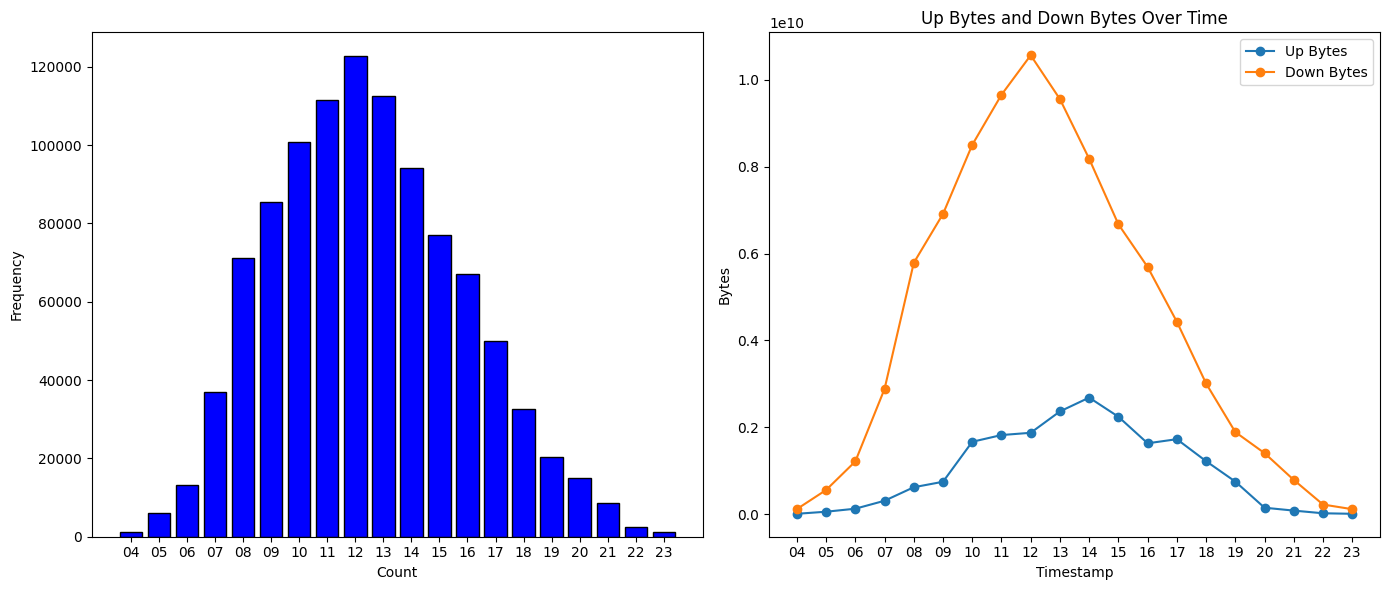

In [69]:

# Plotting
plt.figure(figsize=(14, 6))

# Histogram for timestamp count
plt.subplot(1, 2, 1)
plt.bar(grouped_df['timestamp'], grouped_df['timestamp_count'], color='blue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Line plot for up_bytes and down_bytes
plt.subplot(1, 2, 2)
plt.plot(grouped_df['timestamp'], grouped_df['up_bytes'], marker='o', label='Up Bytes')
plt.plot(grouped_df['timestamp'], grouped_df['down_bytes'], marker='o', label='Down Bytes')
plt.title('Up Bytes and Down Bytes Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bytes')
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
times_cnt = maxt.groupby("src_ip")["timestamp"].value_counts().unstack(fill_value=0).reset_index()
times_cnt.sum(axis=0)


timestamp
src_ip    192.168.107.100192.168.107.101192.168.107.1021...
04                                                     1277
05                                                     6163
06                                                    13331
07                                                    36960
08                                                    71211
09                                                    85445
10                                                   100759
11                                                   111598
12                                                   122688
13                                                   112464
14                                                    94071
15                                                    77139
16                                                    67001
17                                                    50034
18                                                    32659
19                            